In [1]:
import cv2
import sys
from matplotlib import pyplot as plt
from ultralytics import YOLO

In [2]:

# Initialize GOTURN tracker.It scans current working directory for goturn.caffemodel an goturn.prototxt. 
# and use them to initialize the tracker.
#tracker = cv2.TrackerGOTURN.create()

# Load YOLO model from YOLO
#model1 = YOLO('yolo11n.pt') #It just classify objects in image
model = YOLO('license_plate_detector_model.pt')  # It detects numberplate in image

In [7]:
def predict_and_plot(path_test_car):
    """
    Predicts and plots the bounding boxes on the given test image using the trained YOLO model.

    Parameters:
    path_test_car (str): Path to the test image file.
    """
    # Perform prediction on the test image using the model
    results = model.predict(path_test_car, device='cpu')

    # Load the image using OpenCV
    image = cv2.imread(path_test_car)
    # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract the bounding boxes and labels from the results
    for result in results:
        for box in result.boxes:
            # Get the coordinates of the bounding box
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Get the confidence score of the prediction
            confidence = box.conf[0]

            # Draw the bounding box on the image
            cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 8)
            # Draw the confidence score near the bounding box
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 5)

    # Plot the image with bounding boxes
    plt.imshow(image)
    plt.axis('off')  
    plt.show() 

In [8]:
import os
car_folder = os.listdir("Car_Number_Plate")


image 1/1 /home/imran/Car-Plate-detection/Car_Number_Plate/IMG_20200222_184852.jpg: 320x256 (no detections), 411.0ms
Speed: 22.9ms preprocess, 411.0ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 256)


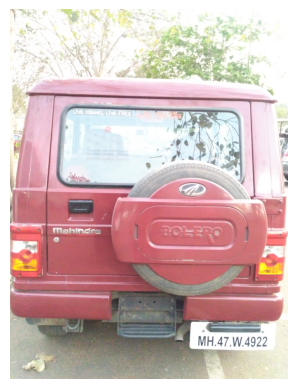


image 1/1 /home/imran/Car-Plate-detection/Car_Number_Plate/IMG_20200222_184205.jpg: 320x256 1 license_plate, 141.9ms
Speed: 2.0ms preprocess, 141.9ms inference, 2.7ms postprocess per image at shape (1, 3, 320, 256)


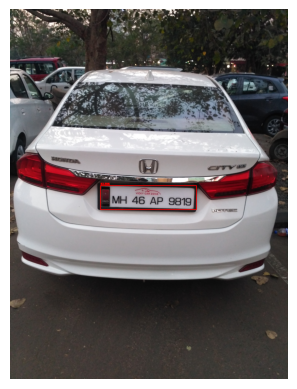


image 1/1 /home/imran/Car-Plate-detection/Car_Number_Plate/IMG_20200222_171921102.jpg: 320x256 1 license_plate, 218.2ms
Speed: 3.7ms preprocess, 218.2ms inference, 6.6ms postprocess per image at shape (1, 3, 320, 256)


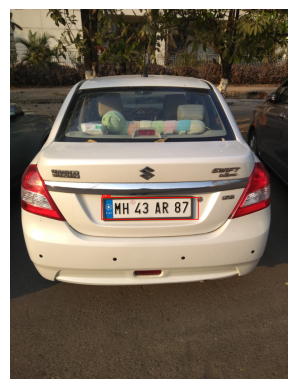

In [9]:
for img in car_folder[0:3]:
    img_path = os.path.join("Car_Number_Plate",img)
    predict_and_plot(img_path)

In [12]:
results = model.predict('/home/imran/Car-Plate-detection/Car_Number_Plate/IMG_20200222_171921102.jpg', device='cpu')


image 1/1 /home/imran/Car-Plate-detection/Car_Number_Plate/IMG_20200222_171921102.jpg: 320x256 1 license_plate, 202.7ms
Speed: 4.2ms preprocess, 202.7ms inference, 1.4ms postprocess per image at shape (1, 3, 320, 256)


In [13]:
results[0].boxes.xyxy

tensor([[1028.5929, 2119.3022, 2113.3342, 2365.3818]])

<h1>Testing on recorder video without object tracking</h1>

In [2]:
video_path = 'resources/race_car.mp4'
model1 = YOLO('yolo11n.pt')

In [3]:
video = cv2.VideoCapture(video_path)
ok, frame = video.read()

# Exit if video not opened
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))  # get video properties_ frame width
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [4]:
width

1728

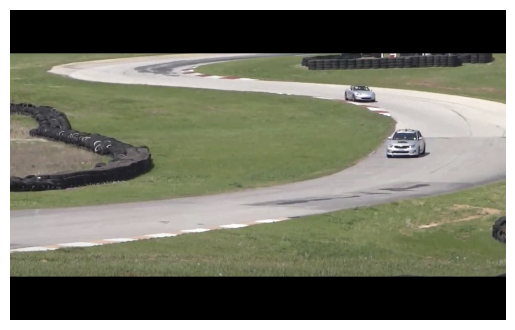

In [5]:
plt.imshow(frame[:,:,::-1])

plt.axis("off")
plt.show()

In [6]:
result = model1.predict(frame, device='cpu')

[W208 17:50:16.393272041 NNPACK.cpp:62] Could not initialize NNPACK! Reason: Unsupported hardware.


0: 416x640 2 cars, 448.7ms
Speed: 5.5ms preprocess, 448.7ms inference, 8.0ms postprocess per image at shape (1, 3, 416, 640)


In [7]:
bboxes = result[0].boxes.xyxy
bboxes

tensor([[1165.0697,  261.2839, 1276.8441,  322.9869],
        [1309.6619,  413.4601, 1450.2965,  513.8674]])

In [8]:
(bboxes[0,0])

tensor(1165.0697)

In [9]:
boxes_lst = []
for box in bboxes:
    boxes_lst.append([(int(box[0]), int(box[1])),(int(box[2]), int(box[3]))])

boxes_lst

[[(1165, 261), (1276, 322)], [(1309, 413), (1450, 513)]]

In [10]:
from typing import List, Tuple
def drawRectangle_1(frame, bboxes: list[Tuple[int, int], Tuple[int, int]]):
    for box in bboxes:
        cv2.rectangle(frame, box[0],box[1], (255, 0, 0), 2, 1)



def displayRectangle(frame, bboxes):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bboxes)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    plt.axis("off")

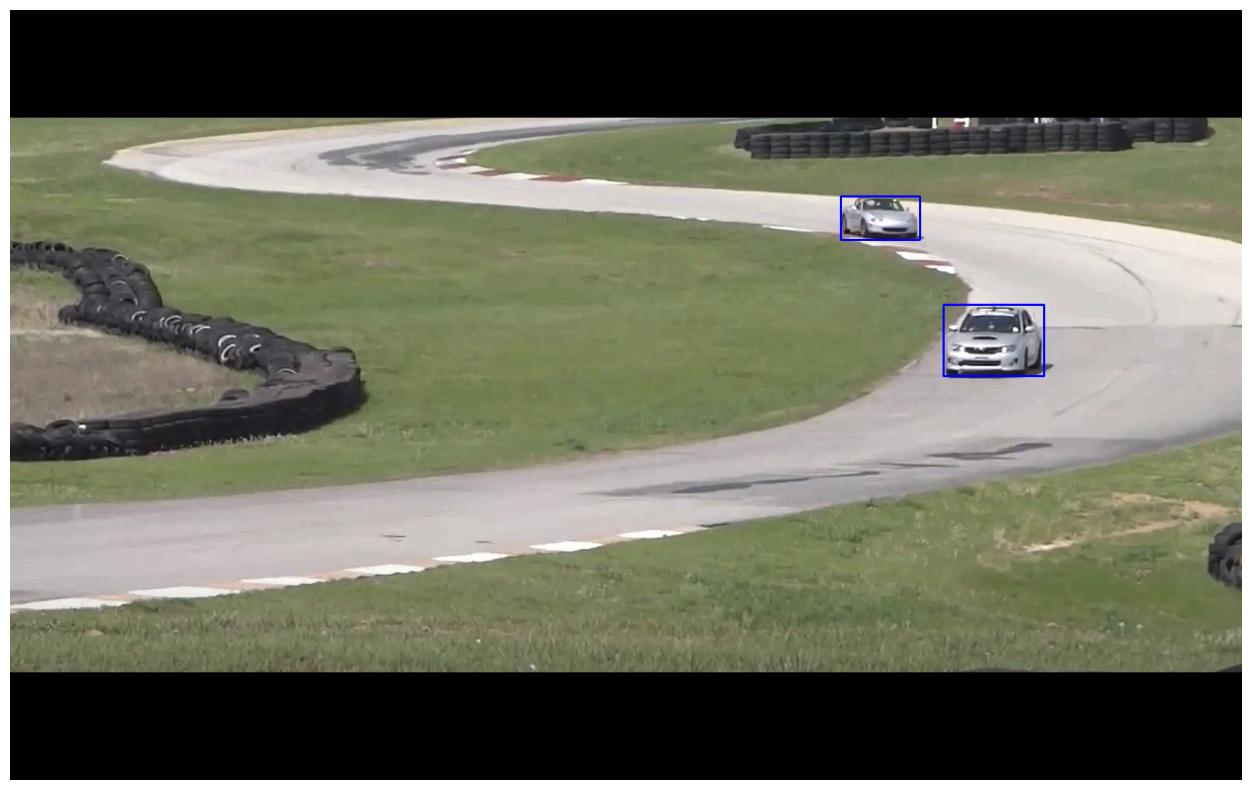

In [11]:
displayRectangle(frame, boxes_lst)

In [16]:
tracker = cv2.TrackerGOTURN.create()

In [17]:
bbox = bbox_tuple = tuple(tuple(map(int, box)) for box in bboxes)
bbox

((1165, 261, 1276, 322), (1309, 413, 1450, 513))

In [18]:
bbox[1]

(1309, 413, 1450, 513)

In [21]:
ok = tracker.init(frame, bbox[0])

In [22]:
def drawText(frame, txt, location, color=(50, 170, 50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

In [23]:
video_output_file_name = "race_car-" + "GOTURN" + ".mp4"
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*"XVID"), 10, (width, height))


OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [ ]:
tracker_type = "GOTURN"
while True:
    ok, frame = video.read()

    if not ok:
        break

    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else:
        drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))

    # Display Info
    drawText(frame, tracker_type + " Tracker", (80, 60))
    drawText(frame, "FPS : " + str(int(fps)), (80, 100))

    # Write frame to video
    video_out.write(frame)

video.release()
video_out.release()

TypeError: 'int' object is not iterable